#IMPORT LIBRARIES

In [1]:
%tensorflow_version 2.x

In [2]:
# Import tensorflow
import tensorflow as tf

# From Keras, import the functions that allow you to work with layers and models
from tensorflow.keras import layers, models

# From Keras, import the MNIST dataset
from keras.datasets import mnist

# From Keras.utils, import a function that allows you to converts a 
# class vector (integers) to binary class matrix.
from tensorflow.keras.utils import to_categorical
# From sklearn, import the functions that allow you to work with the 
# SVM, Random Forest and Gaussian Naïve Bayes
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# From sklearn, import the functions that allow you to compute the
#confussion matrix and the accuracy score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# From sklearn, import the functions that allow you to split arrays 
# or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

#LOAD THE DATA

In [3]:
# Load the MNIST dataset
_, (images, labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Displaying some images

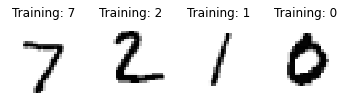

In [4]:
images_and_labels = list(zip(images[:4], labels[:4]))
for index, (image, label) in enumerate(images_and_labels):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

### Split the dataset in training and test sets

In [5]:
# Split the dataset into training and test set, using 30% as test set
train_images, test_images, train_labels, test_labels = train_test_split(
        images, labels, test_size=0.3, shuffle=True)

### To apply classifiers on this data, we need to flatten the image, to turn the data into a (samples, feature) matrix:

In [6]:
# How many images do you have in the training set?
n_train_samples = len(train_images)
train_data = train_images.reshape((n_train_samples, -1))
train_data = train_data.astype('float32') / 255

# How many images do you have in the test set?
n_test_samples = len(test_images)
test_data = test_images.reshape((n_test_samples, -1))
testdata = test_data.astype('float32') / 255

# **CLASSIFYING USING SVM**

In [7]:
print('\n\n***********************************************************')
print('***********************************************************')
print('**** CLASSIFICATION USING SUPPORT VECTOR MACHINE (SVM) ****')
print('***********************************************************')
print('***********************************************************\n\n')



***********************************************************
***********************************************************
**** CLASSIFICATION USING SUPPORT VECTOR MACHINE (SVM) ****
***********************************************************
***********************************************************




### Creating SVM instance

In [8]:
SVM_model = svm.SVC(C=1, kernel = 'linear')

### Fit the SVM model according to the training data

In [9]:
SVM_model.fit(train_data,train_labels)

SVC(C=1, kernel='linear')

### Classify the test data

In [10]:
predicted_classes_SVM = SVM_model.predict(testdata)

### Print the preformance metrics (i.e. accuracy and Confusion Matrix)

In [11]:
accuracy_SVM = accuracy_score(test_labels, predicted_classes_SVM ) # accuracy
print()
print('Accuracy (Support Vector Machine)= {}\n'.format(accuracy_SVM))
cm_SVM = confusion_matrix(test_labels,predicted_classes_SVM ) # Confusion matrix
print('Confusion Matrix with SVM: ')
print(cm_SVM)
print('***********************************************************')
print('***********************************************************')
print('\n\n')


Accuracy (Support Vector Machine)= 0.9223333333333333

Confusion Matrix with SVM: 
[[297   0   0   1   0   1   1   0   0   0]
 [  0 353   2   0   0   2   0   0   2   0]
 [  2   1 269   2   4   1   1   6   6   2]
 [  0   3   6 268   1   3   0   1   6   3]
 [  0   0   3   0 248   0   0   2   0   9]
 [  5   4   0   9   1 221   5   1   7   4]
 [  2   1   5   0   3   1 276   0   2   0]
 [  1   5   5   2   4   0   0 302   0   7]
 [  1   4   6  13   0  13   2   4 271   2]
 [  2   3   2   2  15   4   0  14   1 262]]
***********************************************************
***********************************************************





# **CLASSIFY USING GAUSSIAN NAIVE BAYES**

In [12]:
print('\n\n***********************************************************')
print('***********************************************************')
print('******** CLASSIFICATION USING GAUSSIAN NAIVE BAYES ********')
print('***********************************************************')
print('***********************************************************\n\n')



***********************************************************
***********************************************************
******** CLASSIFICATION USING GAUSSIAN NAIVE BAYES ********
***********************************************************
***********************************************************




### Creating the Gaussian Naive Bayes instance

In [13]:
NB_model = GaussianNB()

### Fit the Naive Bayes classifier according to the training data

In [14]:
NB_model.fit(train_data, train_labels )

GaussianNB()

### Classify the test data

In [15]:
predicted_classes_NB = NB_model.predict(testdata)

### Print the preformance metrics (i.e. accuracy and Confusion Matrix)

In [16]:
accuracy_NB =  accuracy_score(test_labels, predicted_classes_SVM ) # accuracy
print()
print('Accuracy (Gaussian Naive Bayes)= {}\n'.format(accuracy_NB))
cm_NB =  confusion_matrix(test_labels, predicted_classes_SVM ) # Confusion matrix
print('Confusion Matrix with Gaussian Naive Bayes: ')
print(cm_NB)
print('***********************************************************')
print('***********************************************************')
print('\n\n')


Accuracy (Gaussian Naive Bayes)= 0.9223333333333333

Confusion Matrix with Gaussian Naive Bayes: 
[[297   0   0   1   0   1   1   0   0   0]
 [  0 353   2   0   0   2   0   0   2   0]
 [  2   1 269   2   4   1   1   6   6   2]
 [  0   3   6 268   1   3   0   1   6   3]
 [  0   0   3   0 248   0   0   2   0   9]
 [  5   4   0   9   1 221   5   1   7   4]
 [  2   1   5   0   3   1 276   0   2   0]
 [  1   5   5   2   4   0   0 302   0   7]
 [  1   4   6  13   0  13   2   4 271   2]
 [  2   3   2   2  15   4   0  14   1 262]]
***********************************************************
***********************************************************





# **CLASSIFY USING A RANDOM FOREST**

In [17]:
print('\n\n************************************************************')
print('************************************************************')
print('************ CLASSIFICATION USING RANDOM FOREST ************')
print('************************************************************')
print('************************************************************\n\n')



************************************************************
************************************************************
************ CLASSIFICATION USING RANDOM FOREST ************
************************************************************
************************************************************




### Creating the Random Forest instance

In [18]:
RndForest_model = RandomForestClassifier(n_estimators=100,max_depth=6)

### Fit the Random Forest model according to the training data

In [19]:
from sklearn.utils.multiclass import type_of_target
RndForest_model.fit(train_data, train_labels)

RandomForestClassifier(max_depth=6)

### Classify the test data

In [20]:
predicted_classes_RF = RndForest_model.predict(testdata)

### Print the preformance metrics (i.e. accuracy and Confusion Matrix)

In [21]:
accuracy_RF = accuracy_score(test_labels, predicted_classes_SVM ) # Accuracy
print()
print('Accuracy (Random Forest)= {}\n'.format(accuracy_RF))
cm_RF = confusion_matrix(test_labels, predicted_classes_SVM ) # Confusion matrix
print('Confusion Matrix with Random Forest: ')
print(cm_RF)
print('***********************************************************')
print('***********************************************************')
print('\n\n')


Accuracy (Random Forest)= 0.9223333333333333

Confusion Matrix with Random Forest: 
[[297   0   0   1   0   1   1   0   0   0]
 [  0 353   2   0   0   2   0   0   2   0]
 [  2   1 269   2   4   1   1   6   6   2]
 [  0   3   6 268   1   3   0   1   6   3]
 [  0   0   3   0 248   0   0   2   0   9]
 [  5   4   0   9   1 221   5   1   7   4]
 [  2   1   5   0   3   1 276   0   2   0]
 [  1   5   5   2   4   0   0 302   0   7]
 [  1   4   6  13   0  13   2   4 271   2]
 [  2   3   2   2  15   4   0  14   1 262]]
***********************************************************
***********************************************************





# **CLASSIFY USING A SHALLOW NEURAL NETWORK**

In [22]:
print('\n\n***********************************************************')
print('***********************************************************')
print('****** CLASSIFICATION USING A SHALLOW NEURAL NETWORK ******')
print('***********************************************************')
print('***********************************************************\n\n')



***********************************************************
***********************************************************
****** CLASSIFICATION USING A SHALLOW NEURAL NETWORK ******
***********************************************************
***********************************************************




### Defining network architecture

In [23]:
NN_model = models.Sequential()
NN_model.add(layers.Dense(64,activation = 'relu' , input_shape=(np.prod(train_data.shape[1:3]),)))
NN_model.add(layers.Dense(10,activation = 'softmax' ))

### Showing network architecture 

In [24]:
print('\n\n**********************************')
print('****** NETWORK ARCHITECTURE ******')
print('**********************************\n')
NN_model.summary()



**********************************
****** NETWORK ARCHITECTURE ******
**********************************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### Compilation of the network

In [29]:
NN_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

### Preparing the labels

In [30]:
# Convert to categorical the training and test labels
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

### Train the network

In [31]:
NN_model.fit(train_data, train_labels_categorical, epochs = 10)

Epoch 1/10
219/219 [==============================] - 2s 3ms/step - loss: 0.1825 - accuracy: 0.7427
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0813 - accuracy: 0.8969
Epoch 3/10
219/219 [==============================] - 1s 2ms/step - loss: 0.0620 - accuracy: 0.9193
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0513 - accuracy: 0.9309
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0441 - accuracy: 0.9417
Epoch 6/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0385 - accuracy: 0.9496
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0339 - accuracy: 0.9571
Epoch 8/10
219/219 [==============================] - 1s 2ms/step - loss: 0.0301 - accuracy: 0.9626
Epoch 9/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0270 - accuracy: 0.9673
Epoch 10/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0244 - accuracy: 0.9719

### Classify the test images

In [32]:
predicted_classes_categorical_NN = NN_model.predict(testdata)

### Get classes in integer format

In [33]:
predicted_classes_NN = np.argmax(predicted_classes_categorical_NN, axis=1)

### Print the preformance metrics (i.e. accuracy and Confusion Matrix)

In [34]:
accuracy_NN = accuracy_score(test_labels, predicted_classes_SVM ) # accuracy
print()
print('Accuracy (Shallow Neural Network)= {}\n'.format(accuracy_NN))
cm_NN = confusion_matrix(test_labels, predicted_classes_SVM ) # Confusion matrix
print('Confusion Matrix with Shallow Neural Network: ')
print(cm_NN)
print('***********************************************************')
print('***********************************************************')
print('\n\n')


Accuracy (Shallow Neural Network)= 0.9223333333333333

Confusion Matrix with Shallow Neural Network: 
[[297   0   0   1   0   1   1   0   0   0]
 [  0 353   2   0   0   2   0   0   2   0]
 [  2   1 269   2   4   1   1   6   6   2]
 [  0   3   6 268   1   3   0   1   6   3]
 [  0   0   3   0 248   0   0   2   0   9]
 [  5   4   0   9   1 221   5   1   7   4]
 [  2   1   5   0   3   1 276   0   2   0]
 [  1   5   5   2   4   0   0 302   0   7]
 [  1   4   6  13   0  13   2   4 271   2]
 [  2   3   2   2  15   4   0  14   1 262]]
***********************************************************
***********************************************************





# **CLASSIFY USING A SMALL CONVOLUTIONAL NEURAL NETWORK**

In [35]:
print('\n\n***********************************************************')
print('***********************************************************')
print('*** CLASSIFICATION USING A CONVOLUTIONAL NEURAL NETWORK ***')
print('***********************************************************')
print('***********************************************************\n\n')



***********************************************************
***********************************************************
*** CLASSIFICATION USING A CONVOLUTIONAL NEURAL NETWORK ***
***********************************************************
***********************************************************




### Preparing image data

In [36]:
train_images_for_CNN = train_images.reshape(train_images.shape + (1,))
train_images_for_CNN = train_images_for_CNN.astype('float32') / 255

test_images_for_CNN = test_images.reshape(test_images.shape + (1,))
test_images_for_CNN = test_images_for_CNN.astype('float32') / 255

### Preparing the labels

In [37]:
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

### Starting the convnet architecture

In [38]:
CNN_model = models.Sequential()
# Include a 2D Convolutional layer with 32 filters with RELU activation function
CNN_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(28, 28, 1)))
# Include a 2D Max Pooling Layer
CNN_model.add(layers.MaxPool2D((2, 2)))

# Include a 2D Convolutional layer with 64 filters
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Include a 2D Max Pooling Layer
CNN_model.add(layers.MaxPool2D((2, 2)))

# Include a 2D Convolutional layer with 64 filters
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Display the architecture of the convnet so far

In [39]:
print('********************************************')
print('**** ARCHITECTURE OF THE CONVNET SO FAR ****')
print('********************************************\n')
CNN_model.summary()

********************************************
**** ARCHITECTURE OF THE CONVNET SO FAR ****
********************************************

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)     

### Adding a classifier on top of the convnet

In [40]:
CNN_model.add(layers.Flatten()) # Flatten layer
CNN_model.add(layers.Dense(64,activation='relu' )) # Dense layer
CNN_model.add(layers.Dense(10, activation='softmax' )) # Dense layer

### Display the architecture of the convnet so far

In [41]:
print('\n\n****************************************************************************')
print('**** ARCHITECTURE OF THE CONVNET AFTER ADDING THE CLASSIFICATION LAYERS ****')
print('****************************************************************************\n')
CNN_model.summary()



****************************************************************************
**** ARCHITECTURE OF THE CONVNET AFTER ADDING THE CLASSIFICATION LAYERS ****
****************************************************************************

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                  

### Compile the network

In [57]:
CNN_model.compile(optimizer='RMSProp', metrics=['accuracy'], loss='mean_squared_error')

### Train the network

In [62]:
# Use a batch size of 64
history = CNN_model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
110/110 [==============================] - 1s 7ms/step - loss: 27.0970 - accuracy: 0.0971
Epoch 2/10
110/110 [==============================] - 1s 7ms/step - loss: 27.0970 - accuracy: 0.0971
Epoch 3/10
110/110 [==============================] - 1s 7ms/step - loss: 27.0970 - accuracy: 0.0971
Epoch 4/10
110/110 [==============================] - 1s 8ms/step - loss: 27.0970 - accuracy: 0.0971
Epoch 5/10
110/110 [==============================] - 1s 5ms/step - loss: 27.0970 - accuracy: 0.0971
Epoch 6/10
110/110 [==============================] - 0s 4ms/step - loss: 27.0970 - accuracy: 0.0971
Epoch 7/10
110/110 [==============================] - 1s 5ms/step - loss: 27.0970 - accuracy: 0.0971
Epoch 8/10
110/110 [==============================] - 0s 4ms/step - loss: 27.0970 - accuracy: 0.0971
Epoch 9/10
110/110 [==============================] - 1s 5ms/step - loss: 27.0970 - accuracy: 0.0971
Epoch 10/10
110/110 [==============================] - 0s 4ms/step - loss: 27.0970 - accura

### Classify the test data

In [63]:
predicted_classes_categorical_CNN = CNN_model.predict(test_images)

### Get classes in integer format

In [64]:
predicted_classes_CNN = np.argmax(predicted_classes_categorical_CNN, axis=1)

### Print the performance metrics (i.e. accuracy and Confusion Matrix)

In [65]:
accuracy_CNN = accuracy_score(test_labels, predicted_classes_SVM )# Accuracy
print()
print('Accuracy (Convolutional Neural Network)= {}\n'.format(accuracy_CNN))
cm_CNN = confusion_matrix(test_labels, predicted_classes_SVM )# Confusion matrix
print('Confusion Matrix with Convolutional Neural Network: ')
print(cm_CNN)
print('***********************************************************')
print('***********************************************************')
print('\n\n')


Accuracy (Convolutional Neural Network)= 0.9223333333333333

Confusion Matrix with Convolutional Neural Network: 
[[297   0   0   1   0   1   1   0   0   0]
 [  0 353   2   0   0   2   0   0   2   0]
 [  2   1 269   2   4   1   1   6   6   2]
 [  0   3   6 268   1   3   0   1   6   3]
 [  0   0   3   0 248   0   0   2   0   9]
 [  5   4   0   9   1 221   5   1   7   4]
 [  2   1   5   0   3   1 276   0   2   0]
 [  1   5   5   2   4   0   0 302   0   7]
 [  1   4   6  13   0  13   2   4 271   2]
 [  2   3   2   2  15   4   0  14   1 262]]
***********************************************************
***********************************************************



